# Decision Trees
- Lahko uporabljamo za regression ali klasifikacijo
- Model se nauči hiearhijo if stavkov
- Pri drevesih podatkov ni potrebno skalirati !

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<img src="./images/decision_tree.png"/>

<img src="./images/dt_01.png"/>

## Building decision trees
- v praksi ne splitamo do konca, saj s tem povzročamo overfitting
- določimo maksimalno globino drevesa (max. depth)

<img src="./images/two_moons.png"/>

Primer podatkov zgoraj - dve pol-luni. Takšne primere je težko reševati z linearnimi modeli

<img src="./images/depth_1.png"/>

<img src="./images/depth_2.png">

<img src="./images/depth_9.png">

---

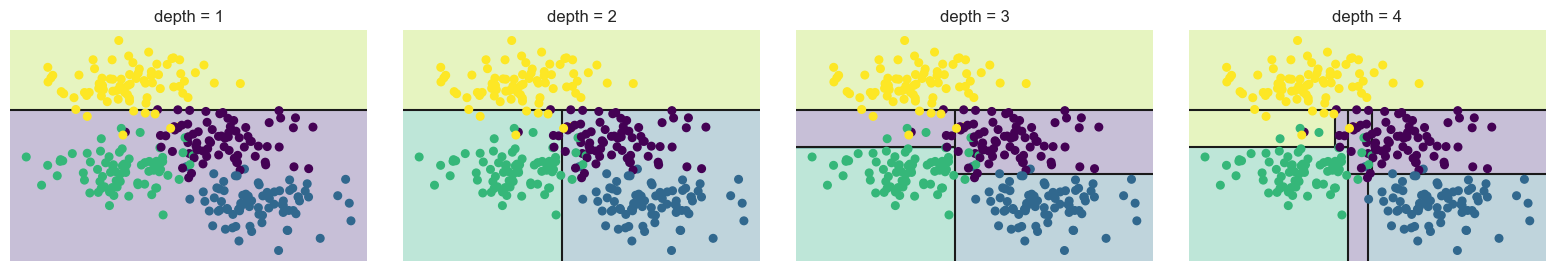

In [15]:
from helpers import helpers_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    helpers_tree.visualize_tree(model, X, y, ax=axi)
    axi.set_title(f'depth = {depth}')

plt.show()
# klasifikaciramo na vec kot samo 2 kategoriji

## Measuring purity

<img src="./images/dt_08.png"/>

- TODO: poglej si kakšno vlogo pri grajenju ima entropija
- entropija predstavlja cost function za optimalno deljenje drevesa.
- zmanjsanje entropije -> information gain
- information gain je odvisen tudi od tega koliko vzorcev je v posameznem clustru


Drug način
- za grajenje lahko uporabimo tudi Gini koeficient

## Build a decision tree model using Scikit-learn

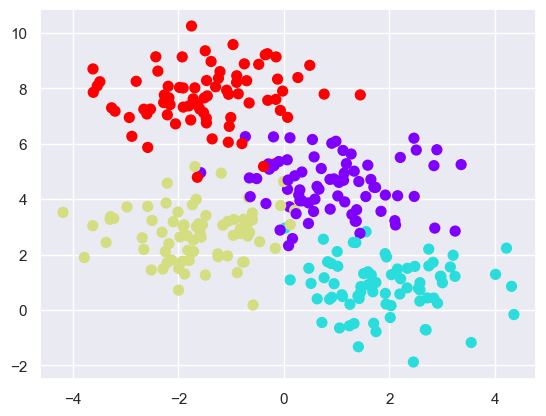

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [17]:
from sklearn.tree import DecisionTreeClassifier # vsi drevesni modeli so v sklearn.tree

tree = DecisionTreeClassifier().fit(X, y)

In [18]:
from helpers import helpers_tree

helpers_tree.plot_tree_interactive(X, y)
plt.show()

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=5)…

## Controlling complexity of decision trees

#### Kako rešujemo pre-kompleksnost (overfitting) dreves?
- omejimo njihovo globino -> možnih več načinov (pre-prunning, post-prunning (tega ni v Scikitlearnu))
- zgradimo večje število dreves in združimo več teh algoritmov v združen algoritem (ensemble) -> Random forests method !!

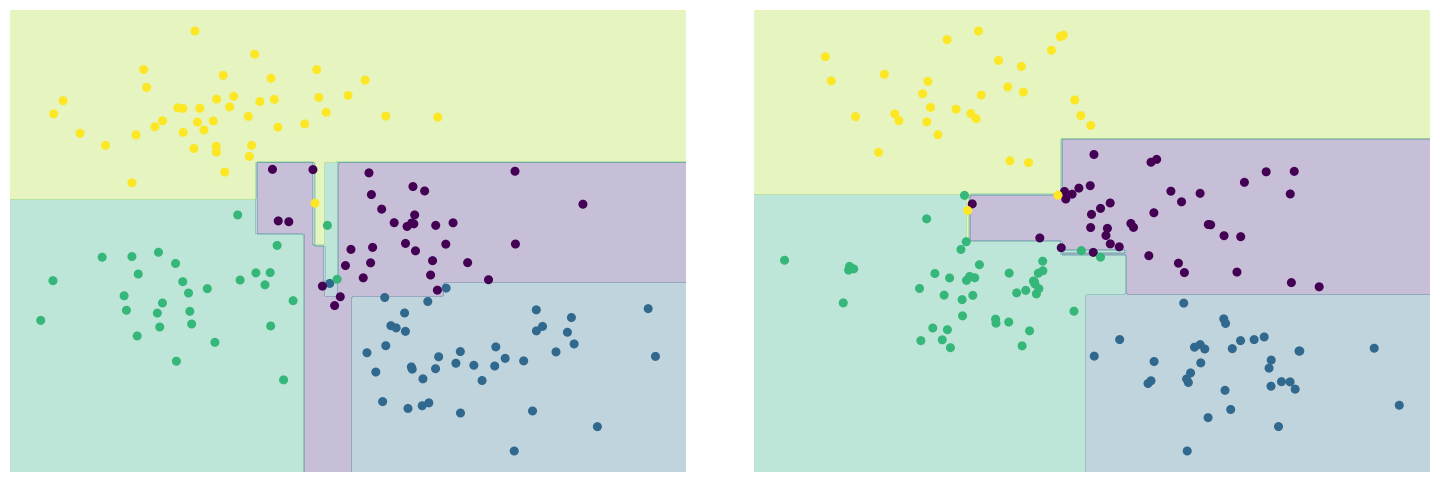

In [19]:
from helpers import helpers_tree

model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
helpers_tree.visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
helpers_tree.visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])
plt.show()

# leva slika prikazuje OVERFITTING
# desna slika prikazuje boljši razporeditev drevesa

#### Preprunning v scklearn-u
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

# overfittamo model

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [21]:
# pre-prunning -> omejimo max_depth
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy on training set: {tree.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {tree.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.951


---

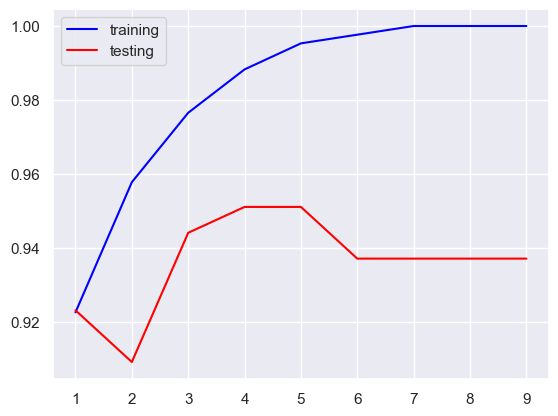

In [22]:
traning_scores = {}
testing_scores = {}

depths = list(range(1,10))

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    traning_scores[depth] = tree.score(X_train, y_train)
    testing_scores[depth] = tree.score(X_test, y_test)
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.show()
# parametriziramo različne globine na najdemo sweet-spot

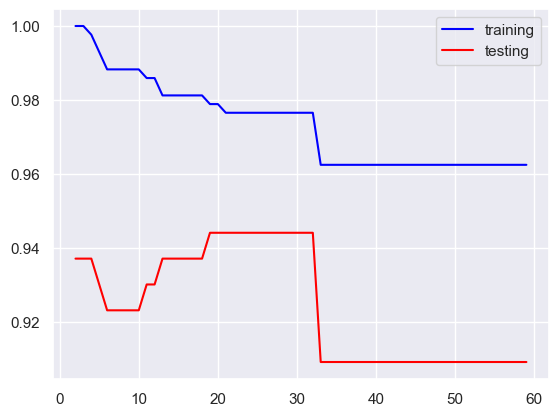

In [23]:
traning_scores = {}
testing_scores = {}

min_samples_splits = list(range(2,60))

for mss in min_samples_splits:
    tree = DecisionTreeClassifier(min_samples_split=mss, random_state=0)
    tree.fit(X_train, y_train)
    traning_scores[mss] = tree.score(X_train, y_train)
    testing_scores[mss] = tree.score(X_test, y_test)
    
plt.plot(traning_scores.keys(), traning_scores.values(), c="blue", label="training")
plt.plot(testing_scores.keys(), testing_scores.values(), c="red", label="testing")
plt.legend()
plt.show()

# parametriziramo in pogledamo natančnosti modela glede na minimalno število sample-ov

## Analyzing decision trees

In [24]:
from sklearn.tree import export_graphviz

In [25]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="data/tree.dot", 
                class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True)

In [ ]:
import graphviz
# dobro orodje za izris drevesa -> odlično za vizualizacijo in razumevanje kako dela algoritem
# graphviz -> moramo ločeno naložiti na sistem https://graphviz.org/download/

with open("data/tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## Feature importance in trees

In [ ]:
tree.feature_importances_

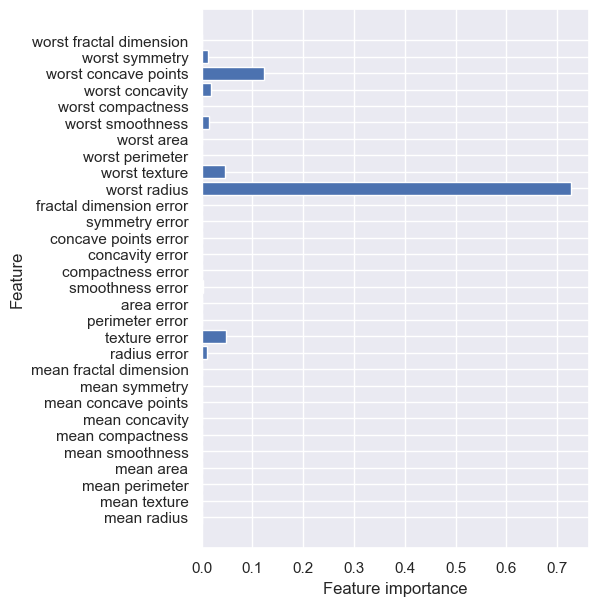

In [29]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(5, 7))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

plot_feature_importances_cancer(tree)
# izrisemo katere značilke najbolj vplivajo na končen rezultat
# večja kot je globina -> bolj se feature importance porazdeli

## Using one-hot encoding of categorical features
Uporabljamo za več-kategorične (nebinarne) podatke

<img src="./images/dt_09.png"/>

## Continuous valued features

Posamezno zvezno značilko se razdeli na meje (podobno kot metoda bisekcije).

## Example: Heart dataset

In [36]:
import pandas as pd

heart_data = pd.read_csv('data/heart.csv')
# show the first 5 lines of the dataframe
heart_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [32]:
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

In [38]:
# ustvari ONE-HOT ENCODING
X = pd.get_dummies(X, drop_first=True)

In [34]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)

In [42]:
acc

0.8442028985507246

In [43]:
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, 
                                           criterion=criterion, 
                                           min_samples_leaf=min_samples_leaf, 
                                           random_state=0)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc
                
print(best_params)
print(best_acc)

criterion: gini, max_depth: 4, min_samples_leaf: 5
0.8731884057971014


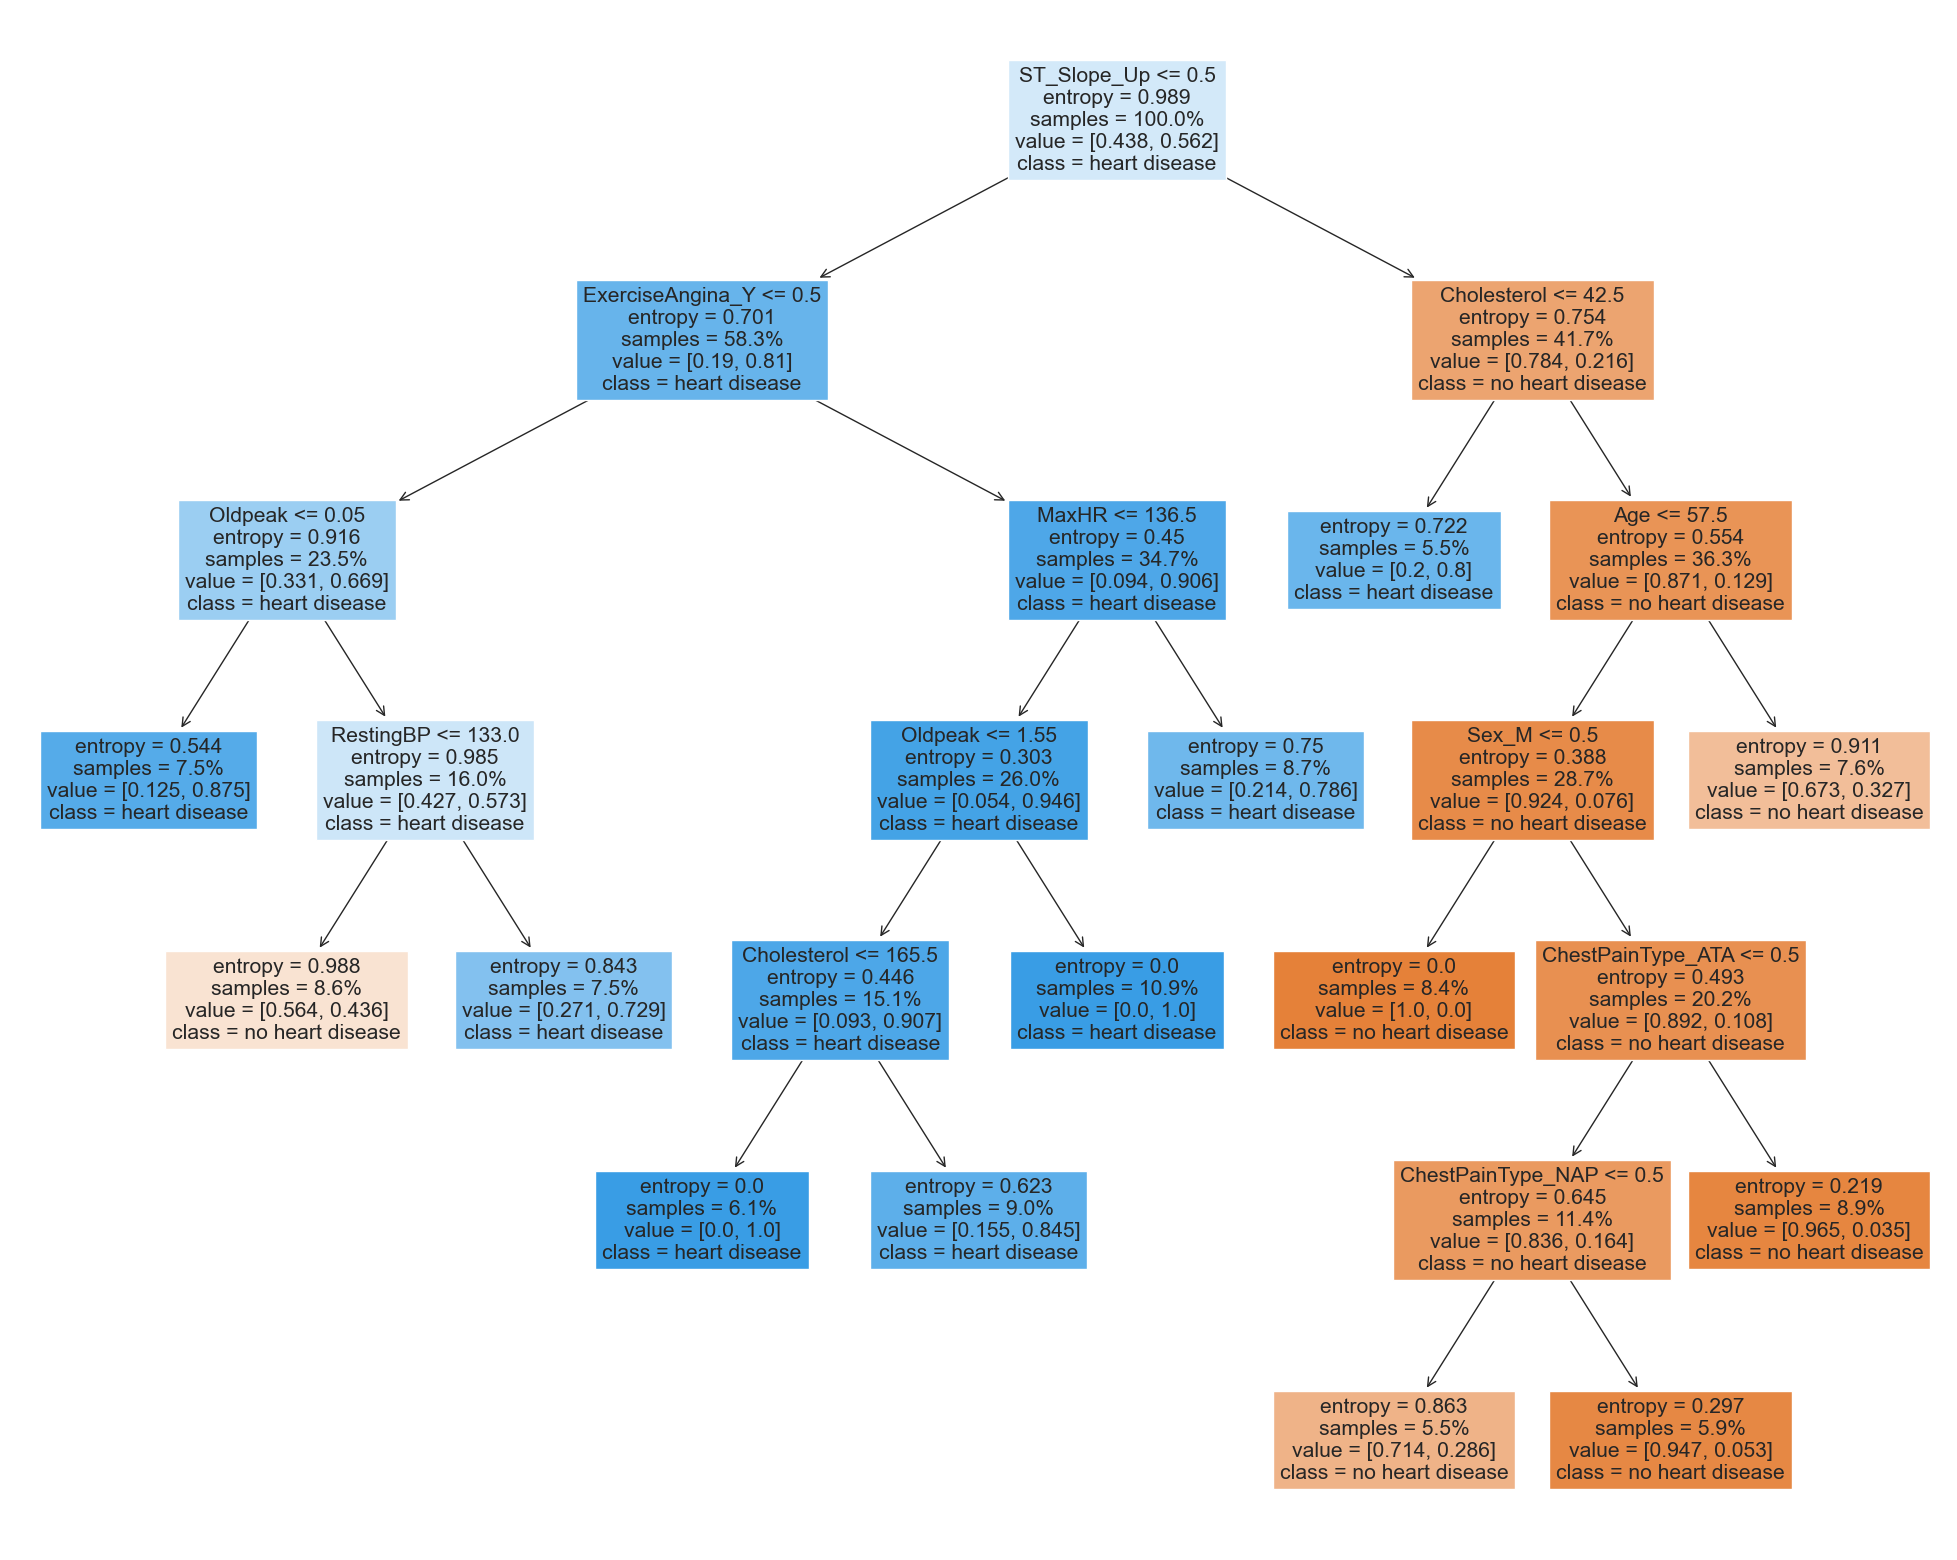

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X.columns,
            class_names=['no heart disease', 'heart disease'], 
            impurity=True,
            proportion=True,
            filled=True)
plt.show()

## Decision trees for regression

**POMEMBNA OMEJITEV: drevesa ne morejo napovedovati izven range-a training podatkov.**, kar regresijski modeli npr. lahko.

In [45]:
ram_prices = pd.read_csv("data/ram_price.csv", index_col=0)

In [46]:
ram_prices.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


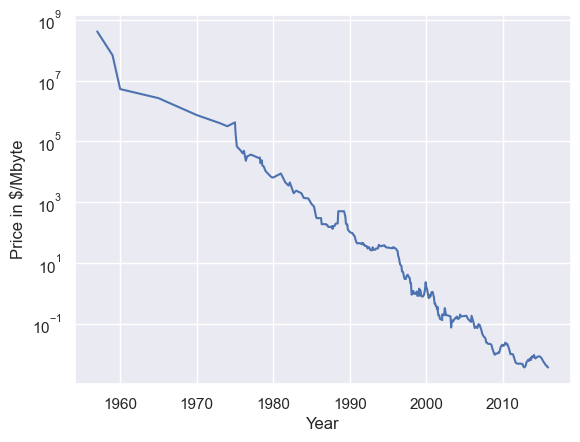

In [47]:
plt.semilogy(ram_prices["date"], ram_prices["price"])
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.show()

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices["date"] < 2000]
data_test = ram_prices[ram_prices["date"] >= 2000]

In [49]:
# predict prices based on date
X_train = data_train["date"].values.reshape(data_train.shape[0] , 1)

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train["price"])

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [50]:
# predict on all data
X_all = ram_prices["date"].values.reshape(ram_prices.shape[0], 1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [51]:
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

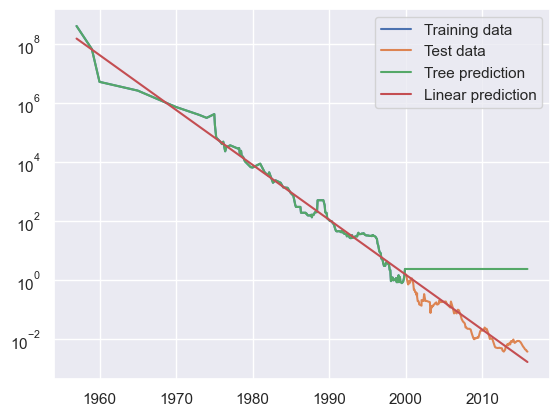

In [52]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()

 **The tree has no ability to generate “new” responses, outside of what was seen in the training
data**. This shortcoming **applies to all models based on trees**.

## Strengths, weaknesses, and parameters

As discussed earlier, the **parameters that control model complexity in decision trees**
are the pre-pruning parameters that stop the building of the tree before it is fully
developed. Usually, picking one of the pre-pruning strategies—setting either
`max_depth`, `max_leaf_nodes`, or `min_samples_leaf` is sufficient to prevent overfitting.

**Decision trees have two advantages** over many of the algorithms we’ve discussed so
far: 
- the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), 
- and the algorithms are completely invariant to scaling of the data.  As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. 

In particular, **decision trees work well** when you have **features that are on completely different scales**, or a **mix of binary and continuous features.**

The **main downside of decision trees** is:
- that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. 
- Therefore, in most applications, the ensemble methods are usually used in place of a single decision tree.

**Algoritmi "random forests" so eni izmed najboljših algoritmov za napovedovanje na realnih primerih!**